In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [43]:
import torch
from torch import nn
from torchvision.transforms.functional import to_pil_image

In [4]:
import yolov1
from yolov1.config import parse_config

In [5]:
from yolov1.data.dataset import YOLODataset
from yolov1.utils.vis import draw_boxes, draw_box

## config

In [6]:
config_path = "../yolov1/src/yolov1/configs/default.yaml"

In [7]:
config = parse_config(config_file=config_path)

config

YOLOConfig(data=DataConfig(root='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data', train='valid', val='valid', names=['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'], augmentations=AugmentationsConfig(horizontal_flip=1.0, vertical_flip=1.0, rotate=0.8, brightness_contrast=0.8, shift_scale_rotate=0.8, random_crop=0.8, random_crop_dims=(448.0, 448.0))), training=TrainingConfig(batch_size=4, num_workers=4, learning_rate=0.001, epochs=2, checkpoints_dir='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints', save_freq=10), inference=InferenceConfig(batch_size=2, checkpoint='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/final_epoch_50.pt', source='/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data/valid/images'), model=ModelConfig(backbone='resnet18', pretrained=True, backbone_output_channels=512, detector_hidden_sz=1024, input_size=(448, 448), conf_th=0.0, S=7, B=1, nc=5))

## dataset

In [103]:
train_ds = YOLODataset(config, mode="train")

2024-05-06T14:41:01.882820Z [info     ] Loaded 250 samples             func_name=get_data lineno=64


In [104]:
sample = train_ds[4]

torch.Size([5, 5])
tensor([4.0000, 0.0425, 0.9082, 0.0850, 0.1792], dtype=torch.float64)


tensor([[4.0000, 0.2122, 0.6351, 0.4244, 0.7253],
        [4.0000, 0.4511, 0.3249, 0.9022, 0.6498],
        [4.0000, 0.4327, 0.4280, 0.4632, 0.5932],
        [4.0000, 0.7132, 0.3092, 0.5662, 0.6185]], dtype=torch.float64)


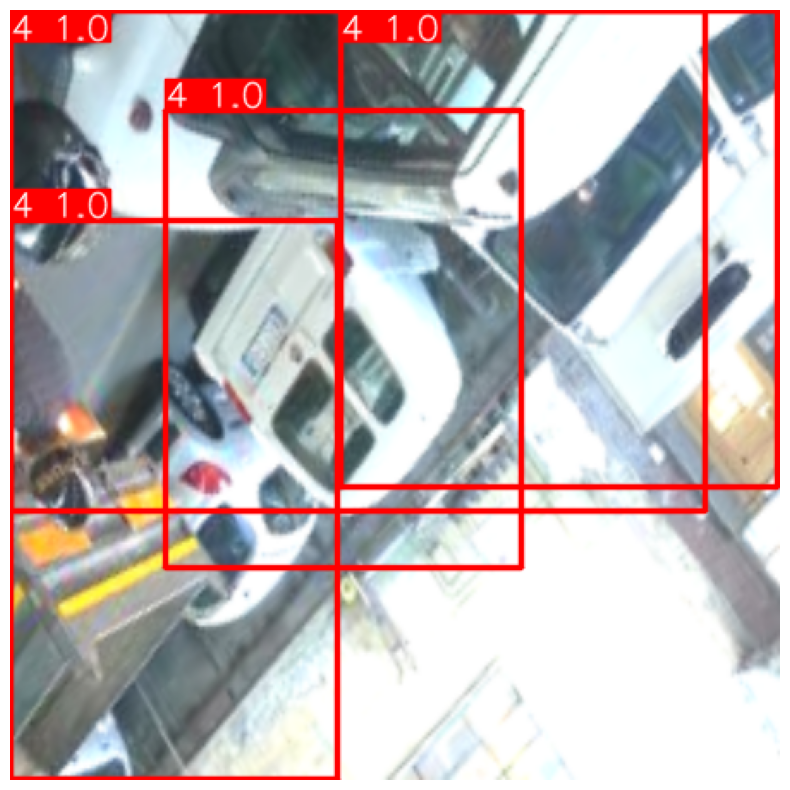

In [102]:
draw_boxes(to_pil_image(sample[0]), sample[1])

In [9]:
val_ds = YOLODataset(config, mode="val")

2024-05-05T06:33:06.848950Z [info     ] Loaded 250 samples             func_name=__init__ lineno=37


In [10]:
val_ds.encode = True

In [12]:
# draw_boxes(val_ds[3][0], val_ds[3][1])

## dataloader

In [13]:
train_dataloader = torch.utils.data.DataLoader(
        train_ds,
        batch_size=config.training.batch_size,
        shuffle=True,
        num_workers=config.training.num_workers,
    )
val_dataloader = torch.utils.data.DataLoader(
    val_ds,
    batch_size=config.training.batch_size,
    shuffle=False,
    num_workers=config.training.num_workers
)

## arch

In [14]:
# from yolov1.models.arch import YOLOv1

In [15]:
# model = YOLOv1(config.model)

## train

In [12]:
from yolov1.train import main

Reloading 'yolov1.models.backbone_factory'.


In [13]:
main(config)

2024-05-06T10:18:58.175771Z [info     ] Loaded 250 samples             func_name=__init__ lineno=39
Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-06T10:18:59.240182Z [info     ] Loaded model successfully      func_name=main lineno=45


/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.venv/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


2024-05-06T10:20:04.019278Z [info     ] Epoch [1/50], Train Loss: 381.9761 func_name=main lineno=55
2024-05-06T10:21:09.077181Z [info     ] Epoch [2/50], Train Loss: 40.9077 func_name=main lineno=55


KeyboardInterrupt: 

## infer

In [10]:
from yolov1.detect import main as detect_main
from yolov1.data.dataset import InferenceDataset

In [11]:
for res in detect_main(config):
    break

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-05T11:41:36.995735Z [info     ] Model loaded successfully      func_name=main lineno=104
2024-05-05T11:41:37.002259Z [info     ] Loaded 250 samples             func_name=__init__ lineno=39


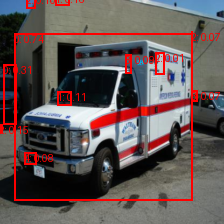

In [15]:
res[0]